## Q. How to decide no of folds while performing K-Fold?
`The number of folds is usually determined by the number of instances contained in your dataset`. For example, if you have 10 instances in your data, 10-fold cross-validation wouldn't make sense. k-fold cross validation is used for two main purposes, to tune hyper parameters and to better evaluate the performance of a model.

In both of these cases selecting k depends on the same thing. You must ensure that the training set and testing set are drawn from the same distribution. And that both sets contain sufficient variation such that the underlining distribution is represented. In a 10-fold cross validation with only 10 instances, there would only be 1 instance in the testing set. This instance does not properly represent the variation of the underlying distribution.

That being said, selecting k is not an exact science because it's hard to estimate how well your fold represents your overall dataset. I usually use 5-fold cross validation. This means that 20% of the data is used for testing, this is usually pretty accurate. However, if your dataset size increases dramatically, like if you have over 100,000 instances, it can be seen that a 10-fold cross validation would lead in folds of 10,000 instances. This should be sufficient to reliably test your model.

In short, yes the number of folds depends on the data size. I usually stick with 4- or 5-fold. Make sure to shuffle your data, such that your folds do not contain inherent bias.

***Depends on how much CPU juice you are willing to afford for the same. `Having a lower K means less variance and thus, more bias, while having a higher K means more variance and thus, and lower bias`.
Also, one should keep in mind the computational costs for the different values. `High K means more folds, thus higher computational time and vice versa. So, one needs to find a sweet spot between those by doing a hyper tuning analysis`.
Also, you need to keep the size of your data in mind. If your data is very less, then even using a k-fold crossval wouldn't make sense. So, you might want to `use a leave-one-out CV (LOOCV)`.***

### What is Leave-One-Out Cross-Validation (LOOCV)?

LOOCV is the case of Cross-Validation where just a single observation is held out for validation.   

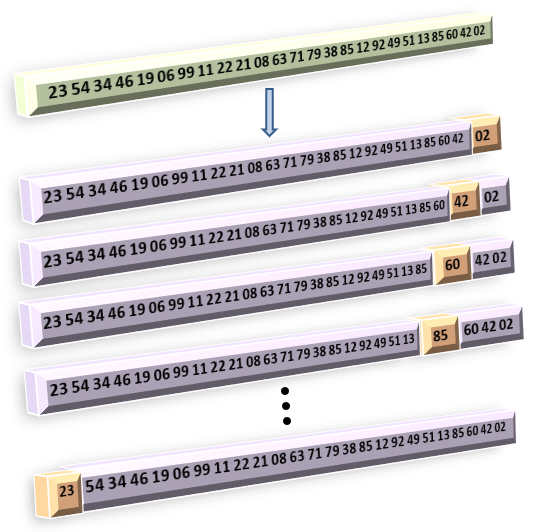

The model is evaluated for every held out observation. The final result is then calculated by taking the mean of all the individual evaluations.
This technique addresses the drawback of using small training sets, seen in the general validation set approach, as the model is fitted on almost all the training samples (n-1 observations). However, there are two problems with LOOCV.
1. It can be computationally expensive to use LOOCV, particularly if the data size is large and also if the model takes substantial time to complete the learning just once. This is because we are iteratively fitting the model on the whole training set.
2. The other problem with LOOCV is that it can be subject to high variance or overfitting as we are feeding the model almost all the training data to learn and just a single observation to evaluate.

### k-Fold Cross-Validation
This approach involves randomly dividing the data into k approximately equal folds or groups. Each of these folds is then treated as a validation set in k different iterations.  
Here k = 5

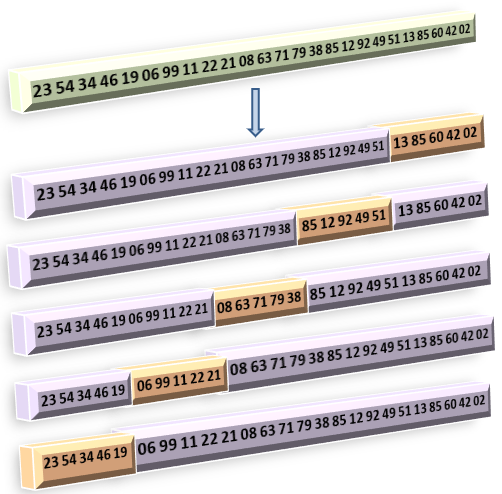

As can be seen in the figure, the 5 folds or groups are selected as validation sets while the rest of the data is used to train the model.

`This approach addresses the drawbacks of LOOCV as it only takes the k-th portion of data to validate and thus allows the model to train on substantial number of observations`. ***It also reduces the computational expenses as compared to LOOCV as the number of iterations is now reduced to k from n (where k<<n).***

### However

* LOOCV is a special case of k-Fold Cross-Validation where k is equal to the size of data (n).
* Using k-Fold Cross-Validation over LOOCV is one of the examples of Bias-Variance Trade-off. It reduces the variance shown by LOOCV and introduces some bias by holding out a substantially large validation set.

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection

In [2]:
df_train = pd.read_csv("../input/song-popularity-prediction/train.csv")

In [3]:
df_train["kfold"] = -1

kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=69)
for fold, (train_indicies, valid_indicies) in enumerate(kf.split(X=df_train)):
    df_train.loc[valid_indicies, "kfold"] = fold

In [4]:
df_train.to_csv("train_5_folds.csv", index=False)

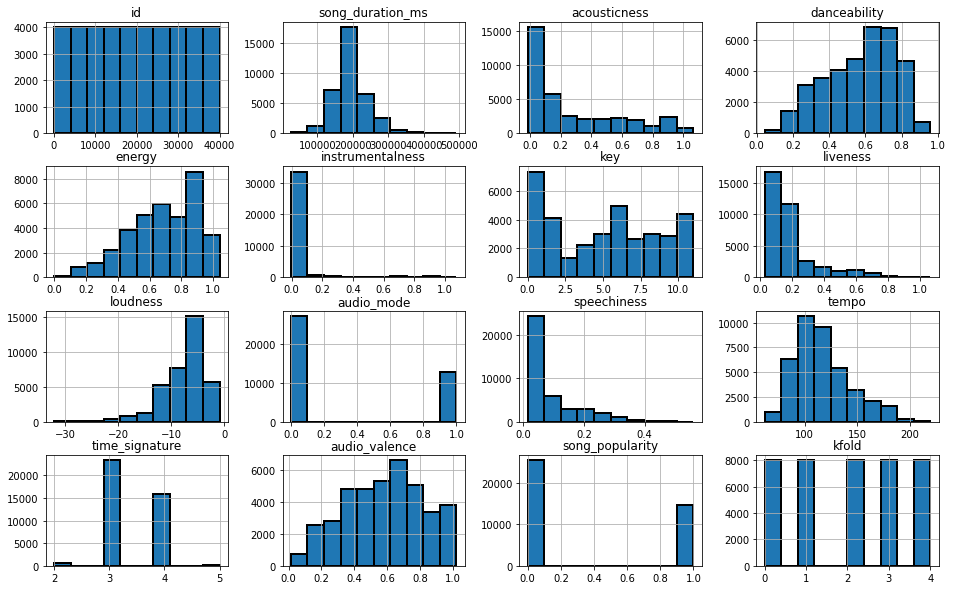

In [5]:
df_train.hist(figsize=(16,10), edgecolor='Black', linewidth=2);

## We can see kfold is uniformly distributed